1. Linear regression by using Deep Neural network: Implement Boston housing price prediction problem by Linear regression using Deep Neural network. Use Boston House price prediction dataset

Reference
https://inside-machinelearning.com/en/how-to-do-linear-regression-with-keras/

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [2]:
data=pd.read_csv("boston_housing1.csv")
data

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [3]:

data.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
data


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [5]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [6]:
# Finding out the correlation between the features
corr = data.corr()
corr.shape

(14, 14)

<Axes: >

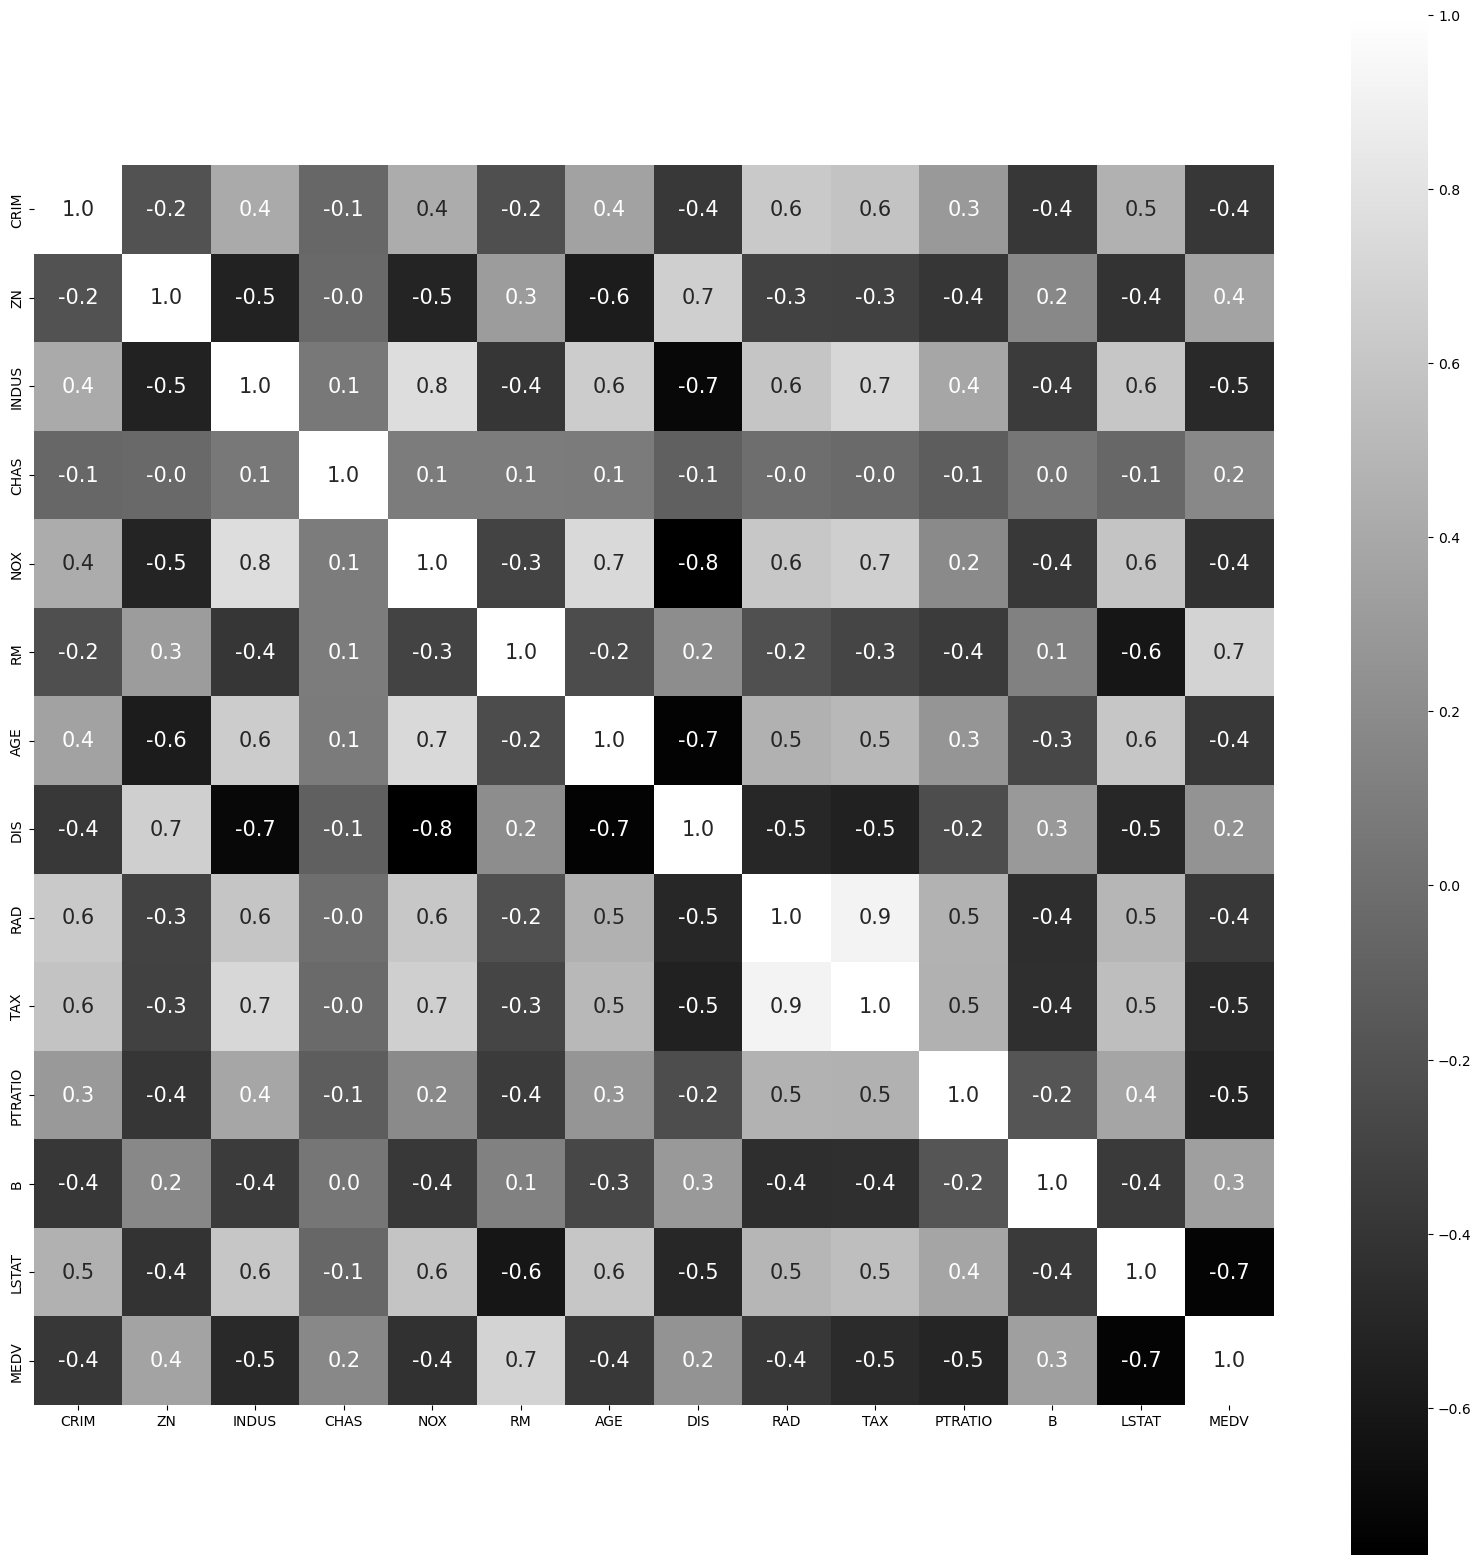

In [7]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='gray')

In [8]:
X =data.drop(['MEDV'], axis = 1)# data['area']#
y = data['MEDV']

In [9]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [10]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [11]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [12]:
y.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

In [13]:
# Splitting to training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

In [14]:
from sklearn.preprocessing import MinMaxScaler
# Instantiate the scaler and fit to training dataset, X_train
scaler = MinMaxScaler()
scaler.fit(X_train)

# Replace unscaled values with scaled values
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
model = Sequential()
model.add(Dense(64, input_dim =13, activation = 'relu'))
model.add(Dropout(0.15))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(40, activation = 'relu'))
model.add(Dropout(0.15))
model.add(Dense(54, activation = 'relu'))
model.add(Dropout(0.18))
model.add(Dense(1))

In [18]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mse', 'mae'])

In [19]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=200)

Epoch 1/200
9/9 [==============================] - 1s 27ms/step - loss: 549.1952 - mse: 549.1952 - mae: 21.7956 - val_loss: 564.3057 - val_mse: 564.3057 - val_mae: 22.0225
Epoch 2/200
9/9 [==============================] - 0s 7ms/step - loss: 518.4194 - mse: 518.4195 - mae: 21.0746 - val_loss: 517.0516 - val_mse: 517.0516 - val_mae: 20.9126
Epoch 3/200
9/9 [==============================] - 0s 7ms/step - loss: 454.2005 - mse: 454.2005 - mae: 19.3768 - val_loss: 414.4823 - val_mse: 414.4823 - val_mae: 18.2417
Epoch 4/200
9/9 [==============================] - 0s 7ms/step - loss: 318.3029 - mse: 318.3029 - mae: 15.4710 - val_loss: 230.1899 - val_mse: 230.1899 - val_mae: 12.5878
Epoch 5/200
9/9 [==============================] - 0s 7ms/step - loss: 161.7100 - mse: 161.7100 - mae: 10.0173 - val_loss: 109.6302 - val_mse: 109.6302 - val_mae: 8.0953
Epoch 6/200
9/9 [==============================] - 0s 7ms/step - loss: 147.1115 - mse: 147.1115 - mae: 9.6095 - val_loss: 94.8223 - val_mse: 94.8

9/9 [==============================] - 0s 7ms/step - loss: 26.6235 - mse: 26.6235 - mae: 3.9189 - val_loss: 28.2486 - val_mse: 28.2486 - val_mae: 3.1610
Epoch 51/200
9/9 [==============================] - 0s 7ms/step - loss: 26.6693 - mse: 26.6693 - mae: 3.8765 - val_loss: 27.2381 - val_mse: 27.2381 - val_mae: 3.1869
Epoch 52/200
9/9 [==============================] - 0s 7ms/step - loss: 24.6268 - mse: 24.6268 - mae: 3.6916 - val_loss: 32.0820 - val_mse: 32.0820 - val_mae: 3.3081
Epoch 53/200
9/9 [==============================] - 0s 7ms/step - loss: 27.8460 - mse: 27.8460 - mae: 4.0441 - val_loss: 27.0257 - val_mse: 27.0257 - val_mae: 3.1162
Epoch 54/200
9/9 [==============================] - 0s 7ms/step - loss: 34.4144 - mse: 34.4144 - mae: 4.3775 - val_loss: 27.8692 - val_mse: 27.8692 - val_mae: 3.1814
Epoch 55/200
9/9 [==============================] - 0s 7ms/step - loss: 28.7919 - mse: 28.7919 - mae: 3.9239 - val_loss: 31.6789 - val_mse: 31.6789 - val_mae: 3.2978
Epoch 56/200
9/9 

9/9 [==============================] - 0s 7ms/step - loss: 18.5389 - mse: 18.5389 - mae: 3.2132 - val_loss: 19.4870 - val_mse: 19.4870 - val_mae: 2.8770
Epoch 100/200
9/9 [==============================] - 0s 7ms/step - loss: 21.5172 - mse: 21.5172 - mae: 3.4481 - val_loss: 24.0732 - val_mse: 24.0732 - val_mae: 3.0365
Epoch 101/200
9/9 [==============================] - 0s 7ms/step - loss: 22.4763 - mse: 22.4763 - mae: 3.4712 - val_loss: 20.3978 - val_mse: 20.3978 - val_mae: 2.7871
Epoch 102/200
9/9 [==============================] - 0s 7ms/step - loss: 20.4978 - mse: 20.4978 - mae: 3.4105 - val_loss: 21.0213 - val_mse: 21.0213 - val_mae: 2.8223
Epoch 103/200
9/9 [==============================] - 0s 8ms/step - loss: 22.0806 - mse: 22.0806 - mae: 3.5386 - val_loss: 21.6165 - val_mse: 21.6165 - val_mae: 2.8435
Epoch 104/200
9/9 [==============================] - 0s 7ms/step - loss: 23.2152 - mse: 23.2152 - mae: 3.5633 - val_loss: 22.6464 - val_mse: 22.6464 - val_mae: 2.8551
Epoch 105/20

9/9 [==============================] - 0s 8ms/step - loss: 15.3821 - mse: 15.3821 - mae: 2.9317 - val_loss: 18.3238 - val_mse: 18.3238 - val_mae: 2.6853
Epoch 149/200
9/9 [==============================] - 0s 8ms/step - loss: 16.2991 - mse: 16.2991 - mae: 3.0619 - val_loss: 18.3737 - val_mse: 18.3737 - val_mae: 2.6384
Epoch 150/200
9/9 [==============================] - 0s 9ms/step - loss: 15.8354 - mse: 15.8354 - mae: 3.0166 - val_loss: 18.2220 - val_mse: 18.2220 - val_mae: 2.6333
Epoch 151/200
9/9 [==============================] - 0s 7ms/step - loss: 15.9459 - mse: 15.9459 - mae: 2.9598 - val_loss: 18.3977 - val_mse: 18.3977 - val_mae: 2.6502
Epoch 152/200
9/9 [==============================] - 0s 7ms/step - loss: 17.5226 - mse: 17.5226 - mae: 3.2592 - val_loss: 19.8983 - val_mse: 19.8983 - val_mae: 2.6980
Epoch 153/200
9/9 [==============================] - 0s 7ms/step - loss: 16.6851 - mse: 16.6851 - mae: 2.9546 - val_loss: 17.0798 - val_mse: 17.0798 - val_mae: 2.6395
Epoch 154/20

9/9 [==============================] - 0s 7ms/step - loss: 15.7465 - mse: 15.7465 - mae: 2.8958 - val_loss: 17.6927 - val_mse: 17.6927 - val_mae: 2.6325
Epoch 198/200
9/9 [==============================] - 0s 7ms/step - loss: 16.8524 - mse: 16.8524 - mae: 3.1072 - val_loss: 17.7027 - val_mse: 17.7027 - val_mae: 2.6500
Epoch 199/200
9/9 [==============================] - 0s 7ms/step - loss: 12.5586 - mse: 12.5586 - mae: 2.7821 - val_loss: 19.1612 - val_mse: 19.1612 - val_mae: 2.6728
Epoch 200/200
9/9 [==============================] - 0s 7ms/step - loss: 16.7257 - mse: 16.7257 - mae: 3.0035 - val_loss: 19.4909 - val_mse: 19.4909 - val_mae: 2.6967


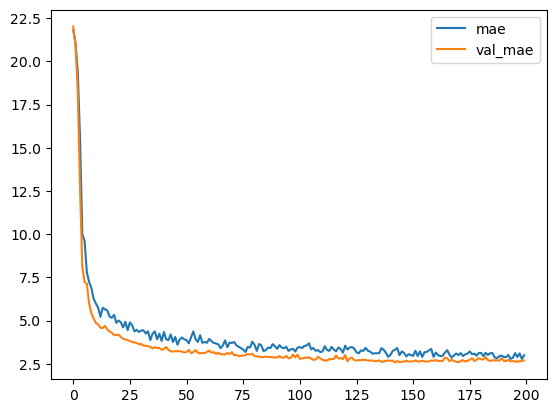

In [20]:
import matplotlib.pyplot as plt

#plot the loss and validation loss of the dataset
plt.plot(history.history['mae'], label='mae')
plt.plot(history.history['val_mae'], label='val_mae')

plt.legend()

In [21]:
scores = model.evaluate(X_test, y_test, verbose = 0)

print('Mean Squared Error : ', scores[1])
print('Mean Absolute Error : ', scores[2])

Mean Squared Error :  19.412582397460938
Mean Absolute Error :  2.718745470046997


In [22]:
Y_pred = model.predict(X_test)
Y_pred

5/5 [==============================] - 0s 4ms/step


array([[15.749367 ],
       [23.330248 ],
       [17.863861 ],
       [18.7301   ],
       [41.546173 ],
       [24.852129 ],
       [29.940134 ],
       [18.033905 ],
       [14.929443 ],
       [18.205948 ],
       [25.77007  ],
       [24.926046 ],
       [18.484726 ],
       [30.710691 ],
       [20.818575 ],
       [11.635891 ],
       [18.97915  ],
       [10.949332 ],
       [10.343568 ],
       [14.528907 ],
       [ 7.1117444],
       [17.334332 ],
       [19.317028 ],
       [20.24193  ],
       [18.347307 ],
       [18.60998  ],
       [19.196243 ],
       [15.738199 ],
       [20.28943  ],
       [16.823362 ],
       [11.401237 ],
       [21.55888  ],
       [31.450468 ],
       [21.7154   ],
       [14.632639 ],
       [15.609604 ],
       [30.801731 ],
       [42.659187 ],
       [22.034443 ],
       [23.84318  ],
       [37.210243 ],
       [29.307194 ],
       [15.050423 ],
       [29.840488 ],
       [30.553463 ],
       [20.963482 ],
       [42.63241  ],
       [17.75

In [23]:
from sklearn.metrics import r2_score

print('r2 score: ', r2_score(y_test,Y_pred))

r2 score:  0.8140914674492552


5/5 [==============================] - 0s 2ms/step


[]

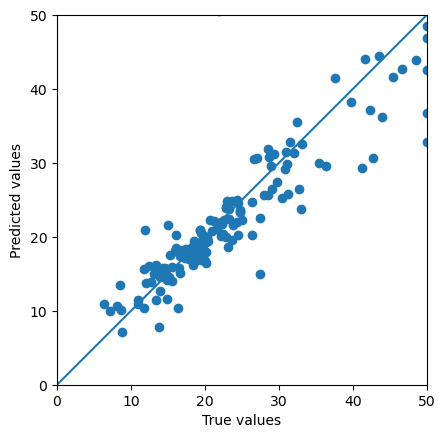

In [24]:
Y_pred = model.predict(X_test)

a = plt.axes(aspect='equal')

plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.xlim([0, 50])
plt.ylim([0, 50])
plt.plot([0, 50], [0,50])
plt.scatter(y_test,Y_pred)
plt.plot()

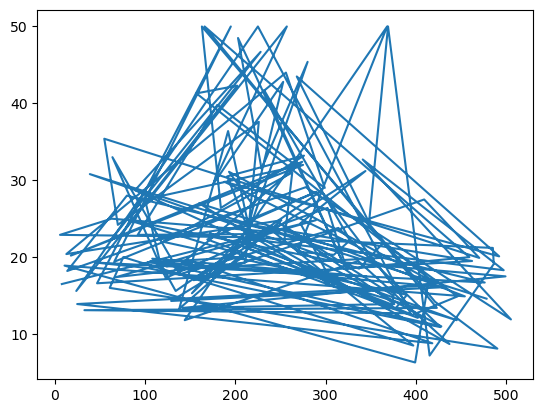

In [25]:
plt.plot(y_test)


array([[15.749367 ],
       [23.330248 ],
       [17.863861 ],
       [18.7301   ],
       [41.546173 ],
       [24.852129 ],
       [29.940134 ],
       [18.033905 ],
       [14.929443 ],
       [18.205948 ],
       [25.77007  ],
       [24.926046 ],
       [18.484726 ],
       [30.710691 ],
       [20.818575 ],
       [11.635891 ],
       [18.97915  ],
       [10.949332 ],
       [10.343568 ],
       [14.528907 ],
       [ 7.1117444],
       [17.334332 ],
       [19.317028 ],
       [20.24193  ],
       [18.347307 ],
       [18.60998  ],
       [19.196243 ],
       [15.738199 ],
       [20.28943  ],
       [16.823362 ],
       [11.401237 ],
       [21.55888  ],
       [31.450468 ],
       [21.7154   ],
       [14.632639 ],
       [15.609604 ],
       [30.801731 ],
       [42.659187 ],
       [22.034443 ],
       [23.84318  ],
       [37.210243 ],
       [29.307194 ],
       [15.050423 ],
       [29.840488 ],
       [30.553463 ],
       [20.963482 ],
       [42.63241  ],
       [17.75

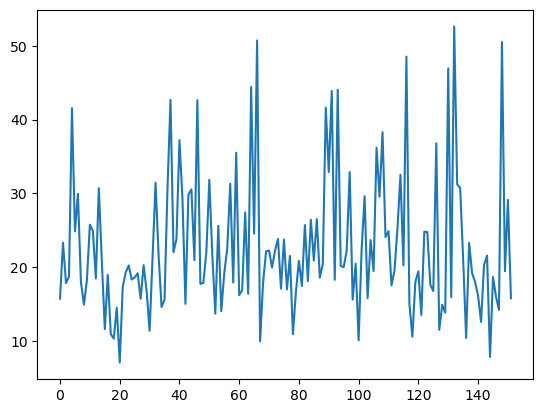

In [26]:
plt.plot(Y_pred)
Y_pred

In [27]:
print(Y_pred[:5])
print(y_test[:5])
y_test.head()

[[15.749367]
 [23.330248]
 [17.863861]
 [18.7301  ]
 [41.546173]]
8      16.5
289    24.8
68     17.4
211    19.3
226    37.6
Name: MEDV, dtype: float64


8      16.5
289    24.8
68     17.4
211    19.3
226    37.6
Name: MEDV, dtype: float64

Using ML MODEL lm for Linear Regression

In [28]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

In [29]:
# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets
lm.fit(X_train, y_train)

LinearRegression()

In [30]:
# Value of y intercept
lm.intercept_

27.38093628000844

In [31]:
#Converting the coefficient values to a dataframe
coeffcients = pd.DataFrame([X.columns,lm.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,CRIM,-10.90502
1,ZN,5.56777
2,INDUS,-0.238526
3,CHAS,4.693448
4,NOX,-7.01579
5,RM,15.865749
6,AGE,-0.33478
7,DIS,-17.068774
8,RAD,7.503741
9,TAX,-7.370872


In [32]:
# Model prediction on train data
y_pred = lm.predict(X_train)

In [33]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.7465991966746854
Adjusted R^2: 0.736910342429894
MAE: 3.089861094971129
MSE: 19.07368870346903
RMSE: 4.367343437774162


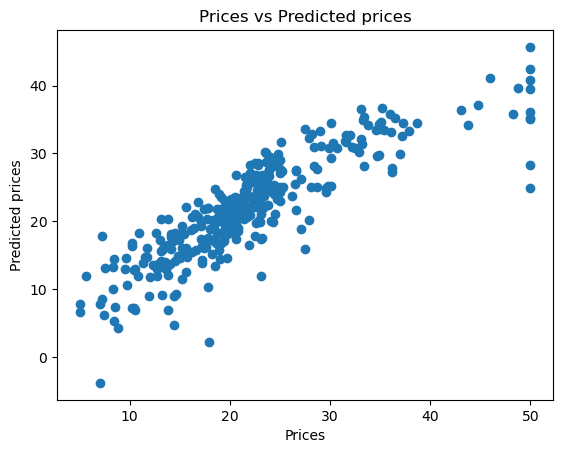

In [34]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

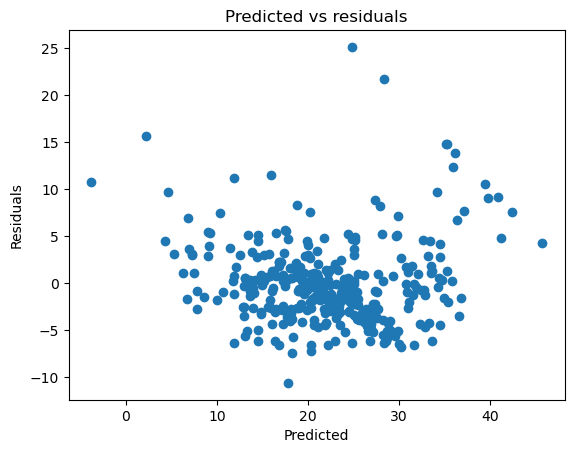

In [35]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

C:\Users\elle\AppData\Local\Temp\ipykernel_1844\3326403628.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train-y_pred)


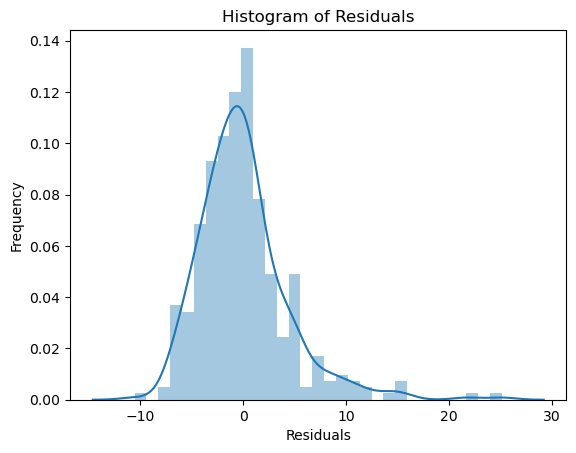

In [36]:
# Checking Normality of errors
sns.distplot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [37]:
# Predicting Test data with the model
y_test_pred = lm.predict(X_test)

In [38]:
# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.7121818377409195
Adjusted R^2: 0.6850685326005713
MAE: 3.859005592370742
MSE: 30.053993307124127
RMSE: 5.482152251362974
